# Lab 2: B&eacute;zier spline aerofoils and flow simulation
## Task 1: create a B&eacute;zier spline aerofoil
In this task you will write a function <code>bezier_spline_aerofoil()</code> that creates a B&eacute;zier spline aerofoil and returns a $201\times 2$ array <code>points</code> of $x,y$ points on the aerofoil from the trailing edge, along the lower surface, round the leading edge, and back along the upper surface to the trailing edge. It should also plot the aerofoil, control points and control polygon.

First you need to import relevant modules:

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as pl

and you'll need <code>rational_bezier</code> from lab 1:

In [4]:
from aclab1 import rational_bezier

Some of the <code>bezier_spline_aerofoil()</code> function has been written for you. In the code below, beneath the '<code># YOUR CODE HERE</code>' comments, delete the '<code>raise NotImplementedError()</code>' and enter your code. Hints (e.g. how you should start your lines of code) are given as comments above the '<code># YOUR CODE HERE</code>' comments. 

In [5]:
def bezier_spline_aerofoil():
    
    # define the control points:
    p = np.array([[1, 0.0], [0.5, 0.08], [0.0, -0.05]])
    q = np.array([[0.0, 0.1], [0.4, 0.2], [1, 0.0]])
    
    # weights
    zp = np.array([1, 1, 1, 1])
    zq = np.array([1, 1, 1, 1])
    
    # calculate degree
    # n and p are the order of p and q respectively
    n = np.float(p.shape[0])
    m = np.float(q.shape[0])
    
    # calculate connection point
    q_start = p_end = (n / (n + m)) * p[-1,:] + (m / (n + m)) * q[0,:]
    
    # and add to control points
    pp = np.vstack([p, p_end])
    qq = np.vstack([q_start, q])
    
    # calculate two curves 
    lower = rational_bezier(pp, zp)
    upper = rational_bezier(qq, zq)
    
    # and join together (removing repeat point at leading edge):
    points = np.concatenate([lower,upper[1:]])

    return points

Check that your function works:

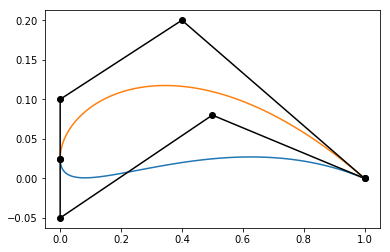

In [6]:
points = bezier_spline_aerofoil()

It should return 201 points, start at the trailing edge $l^{(0)}$, pass through the leading edge $l^{(3)}=u^{(0)}$, and end at the trailing edge $u^{(3)}$:

In [5]:
print(len(points))
print(points[0, :])
print(points[100, :])
print(points[-1, :])

201
[ 1.  0.]
[ 0.     0.025]
[ 1.  0.]


The tests below will be used to grade your submission automatically.

In [6]:
"""Check that bezier returns the correct output for several inputs"""
points = bezier_spline_aerofoil()
assert len(points) == 201
assert np.allclose(points[0,:], [1.0, 0.0], 0.0001)
assert np.allclose(points[-1,:], [1.0, 0.0], 0.0001)
assert np.allclose(points[100,:], [0.0, 0.025], 0.0001)
assert np.allclose(points[65,:], [ 0.1623125,   0.00379437], 0.0001)
pl.clf()

## Task 2: simulate the lift of your aerofoil
In this task you will simulate the lift of your aerofoil using a simple panel code <code>vortex_panel</code>, which is provided in <code>aclabtools</code>:

In [7]:
from aclabtools import vortex_panel

This function takes three arguments: an array of points along the surface of the aerofoil (formatted the same as the output from <code>bezier_spline_aerofoil</code>), the angle of attack of the aerofoil in degrees, and 1 or 0 depending on if you want the function to plot the pressure over the aerofoil. The function has three outputs: the lift coefficent, the pressure coefficient over the surface, and the coordinates of the panel elements where this pressure is calculated. Test it out for your aerofoil:

1.45155264515


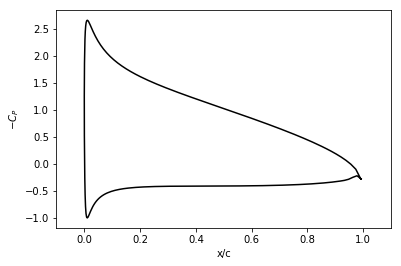

In [8]:
[cl, cp, xc]=vortex_panel(points, 5.0, 1)
print(cl)

In [9]:
vortex_panel(points, 5.0, 0)[0]

1.451552645154069

For attached flow, i.e. when the aerofoil has not stalled, the lift should vary linearly with angle of attack. The function you are using is a 'potential flow' model that cannot predict separation, so we expect the $C_L/\alpha$ trend to be linear for all angles. Complete the function below to calculate the lift coefficent for <code>n_alpha</code> angle of atttack values in a range from <code>alpha_min</code> to <code>alpha_max</code>. The function should also plot a 1$^{\mathrm{st}}$ order (linear) polynomial fit to these data (use numpy's <code>polyfit</code> and <code>poly1d</code>):

In [10]:
def alpha_sweep(points, alpha_min, alpha_max, n_alpha):
    
    alpha = np.linspace(alpha_min, alpha_max, n_alpha)
    
    cl = []
    cl_lin = np.zeros(n_alpha)
    # YOUR CODE HERE
    for a in alpha:
        cl.append(vortex_panel(points, a, 0)[0])
    cl_lin_eq = np.poly1d(np.polyfit(alpha, cl, 1))
    cl_lin = cl_lin_eq(alpha)
    
    # plot results
    pl.plot(alpha, cl_lin, 'r') #cl_lin is your 1st order polynomial prediction
    pl.plot(alpha, cl, 'ko')
    pl.xlabel(r'$\alpha$')
    pl.ylabel(r'$C_L$')
    return cl
    

Test it out:

[0.6543828360472328, 1.0654421957947788, 1.4515526451540688, 1.7935697812190017, 2.0738090349150529]


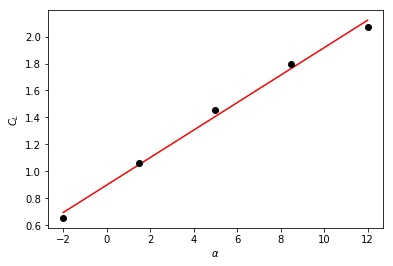

In [ ]:
cl = alpha_sweep(points, -2, 12, 5)
print(cl)

In [ ]:
"""Check that alpha_sweep returns the correct output"""
points = bezier_spline_aerofoil()
test_cl = ([ 0.65438284,  0.83888985,  1.02064066,  1.19788609,  1.36890517,  1.53201694, 1.68559202,  1.82806378,  1.95793918,  2.07380903])
cl = alpha_sweep(points,-2, 12, 10)
assert np.allclose(test_cl, cl, 0.0001)
pl.clf()

Restart the kernel and run all (click "Kernel", "Restart & Run All"), to make sure everything is working before submitting this .ipynb file via Blackboard. 